In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
# from tiling_disk_plots import coordinates_plot
import tiling_disk_plots as tdp
import tiling_disk_utils as tdu
import tiling_disk_optim as optim
from scipy.stats import median_abs_deviation as mad_func
mad_str = 'median_abs_deviation'
from astropy.stats import knuth_bin_width
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("notebook")

# Steel with cap

In [3]:
steel_cap = tdu.read_single_measurement('MSA', '20211201_steel_cap_night.txt')
steel_cap = tdu.df_convert_unix_to_datetime(steel_cap)
steel_cap['z'] = tdu.subtract_mean(steel_cap['z'])
steel_cap['z'] = tdu.convert_mm_to_microns(steel_cap['z'] )

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

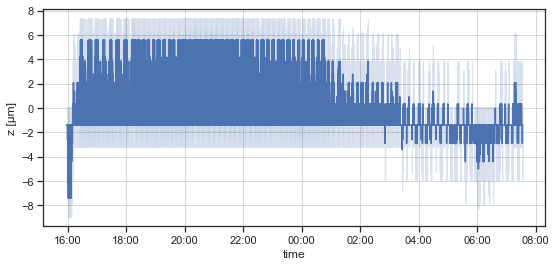

In [4]:
tdp.plot_data_vs_time(steel_cap)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

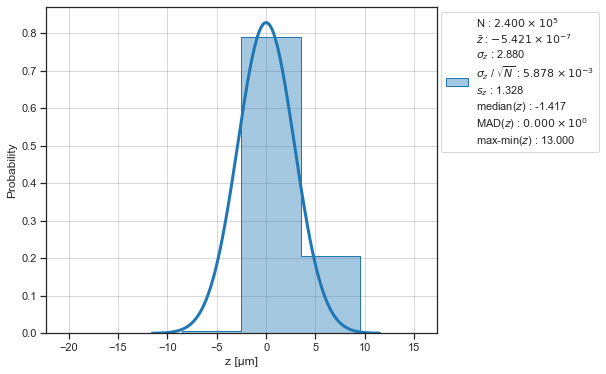

In [5]:
nbins = np.array(range(-20,20,6)) -0.5
tdp.ts_hist(steel_cap, bins=nbins)

# lao stay 24

In [6]:
lao_stay_24 = tdu.read_single_measurement('MSA', '20211202_lao_cap_stay24.txt')
lao_stay_24 = tdu.df_convert_unix_to_datetime(lao_stay_24)
lao_stay_24['z'] = tdu.subtract_mean(lao_stay_24['z'] )
lao_stay_24['z'] = tdu.convert_mm_to_microns(lao_stay_24['z'] )

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

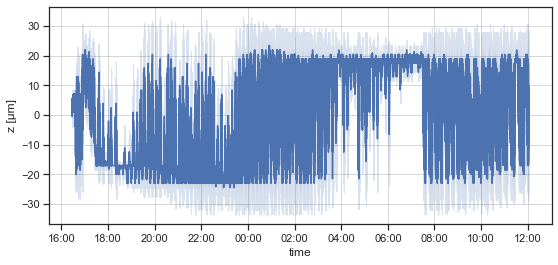

In [7]:
tdp.plot_data_vs_time(lao_stay_24)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

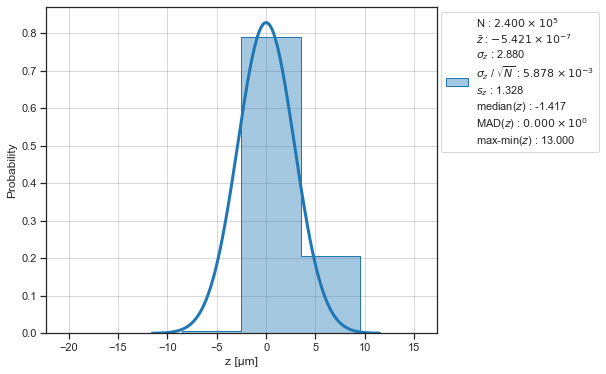

In [13]:
nbins = np.array(range(-20,20,6)) -0.5
tdp.ts_hist(steel_cap, bins=nbins)

# Lao cap stay 7

In [9]:
lao_stay_7 = tdu.read_single_measurement('MSA', "20211207_lao_cap_stay7.txt")
lao_stay_7 = tdu.df_convert_unix_to_datetime(lao_stay_7)
lao_stay_7['z'] = tdu.subtract_mean(lao_stay_7['z'] )
lao_stay_7['z'] = tdu.convert_mm_to_microns(lao_stay_7['z'] )

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

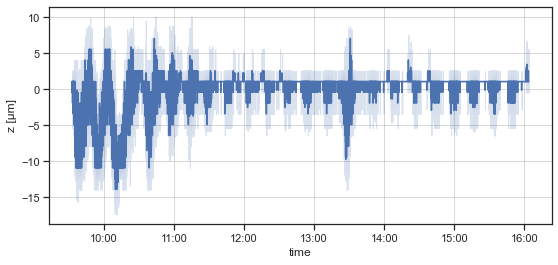

In [10]:
tdp.plot_data_vs_time(lao_stay_7)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

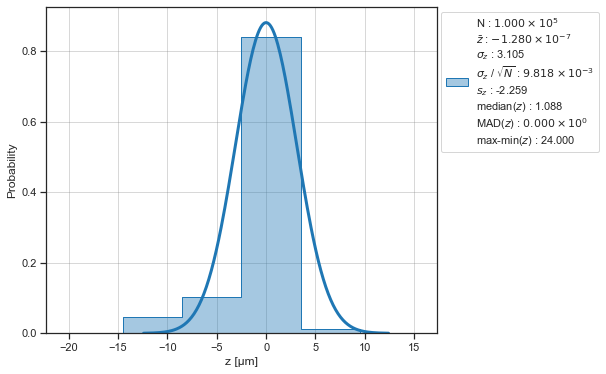

In [11]:
nbins = np.array(range(-20,20,6)) -0.5
tdp.ts_hist(lao_stay_7, bins=nbins)

# Lao quer

In [50]:
lao_quer = tdu.read_single_measurement('MSA', "20211207_lao_quer.txt")
lao_quer = tdu.df_convert_unix_to_datetime(lao_quer)
lao_quer['z'] = tdu.subtract_mean(lao_quer['z'])
lao_quer['z'] = tdu.convert_mm_to_microns(lao_quer['z'])

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

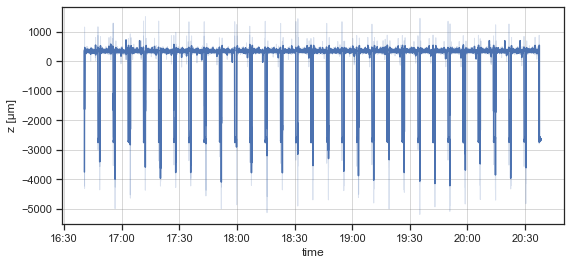

In [51]:
tdp.plot_data_vs_time(lao_quer)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

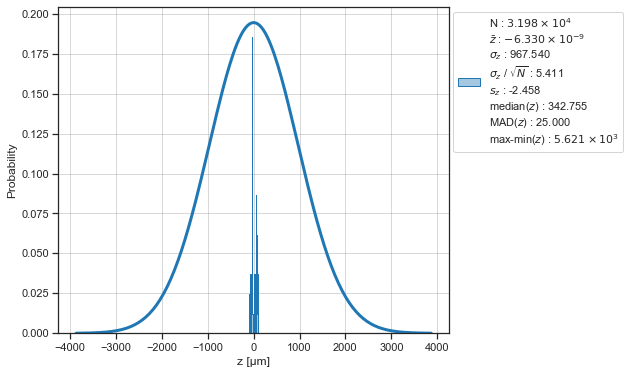

In [52]:
nbins = np.array(range(-100,100,6)) -0.5
tdp.ts_hist(lao_quer, bins=nbins)

In [55]:
lao_quer

,run_nr,hex_nr,point,x,y,z,datetime
96,1,1,8,28.91,16.98,348.754675,2021-12-07 16:41:20+01:00
97,1,1,8,28.98,16.73,367.754675,2021-12-07 16:41:20+01:00
98,1,1,8,29.16,16.55,312.754675,2021-12-07 16:41:21+01:00
102,1,1,9,28.55,16.48,330.754675,2021-12-07 16:41:23+01:00
103,1,1,9,29.05,16.48,348.754675,2021-12-07 16:41:23+01:00
...,...,...,...,...,...,...,...
31883,30,1,75,-28.86,-16.95,-2660.245325,2021-12-07 20:37:36+01:00
31885,30,1,75,-28.36,-16.95,-2703.245325,2021-12-07 20:37:38+01:00
31886,30,1,75,-28.18,-16.77,-2727.245325,2021-12-07 20:37:38+01:00
31889,30,1,76,-29.04,-16.77,-2666.245325,2021-12-07 20:37:39+01:00


In [58]:
lao_quer = tdu.read_single_measurement('MSA', "20211207_lao_quer.txt")
lao_quer = tdu.df_convert_unix_to_datetime(lao_quer)
# cleanup
lao_quer = lao_quer.query(" x < 29.4 & y < 17 ")
lao_quer = lao_quer.query(" x > -29.4 & y > -17 ")
lao_quer = lao_quer.query("-156.6 < z < -156.35 ")

In [59]:
lao_quer['z'] = tdu.subtract_mean(lao_quer['z'])
lao_quer['z'] = tdu.convert_mm_to_microns(lao_quer['z'])

In [60]:
lao_quer

,run_nr,hex_nr,point,x,y,z,datetime
96,1,1,8,28.91,16.98,4.487355,2021-12-07 16:41:20+01:00
97,1,1,8,28.98,16.73,23.487355,2021-12-07 16:41:20+01:00
98,1,1,8,29.16,16.55,-31.512645,2021-12-07 16:41:21+01:00
102,1,1,9,28.55,16.48,-13.512645,2021-12-07 16:41:23+01:00
103,1,1,9,29.05,16.48,4.487355,2021-12-07 16:41:23+01:00
...,...,...,...,...,...,...,...
31851,30,1,73,-26.63,-15.08,-7.512645,2021-12-07 20:37:21+01:00
31855,30,1,73,-27.38,-15.52,108.487355,2021-12-07 20:37:23+01:00
31858,30,1,73,-26.88,-16.02,108.487355,2021-12-07 20:37:24+01:00
31859,30,1,73,-26.63,-15.95,53.487355,2021-12-07 20:37:25+01:00


(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

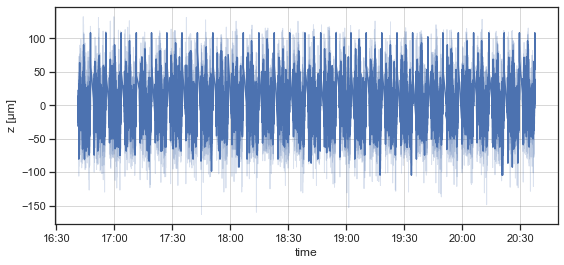

In [62]:
tdp.plot_data_vs_time(lao_quer)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

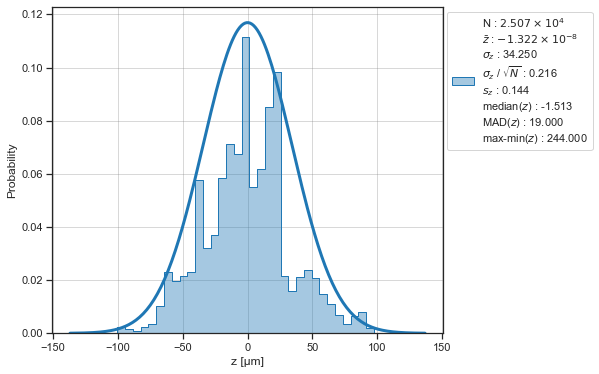

In [63]:
nbins = np.array(range(-100,100,6)) -0.5
tdp.ts_hist(lao_quer, bins=nbins)

Text(0.5, 1.0, 'title')

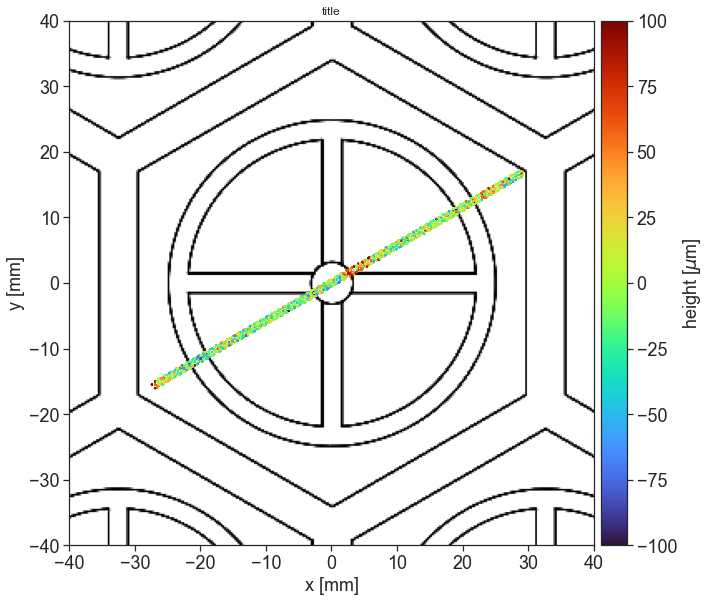

In [61]:
%matplotlib inline
fig, ax = tdp.full_hexagon_plot(lao_quer, mode="z", cmap='turbo',
                                cbar_norm=(-100, 0, 100), size=1**2,
                                figsize=(10,10))

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_title("title")

# Lao Random

In [68]:
lao_random = tdu.read_single_measurement('MSA', '20211208_lao_random24.txt')
lao_random = lao_random.query('x==-17.32 & y==-10.0')
lao_random = lao_random.query("-156.6 < z < -156.2 ")
# lao_quer_pt = tdu.point_table(lao_quer)
lao_random = tdu.df_convert_unix_to_datetime(lao_random)
lao_random.z = tdu.subtract_mean(lao_random.z)
lao_random['z'] = tdu.convert_mm_to_microns(lao_random['z'])

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

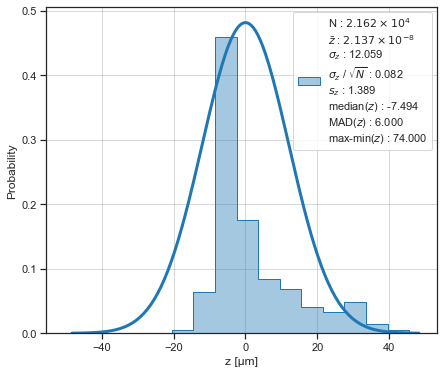

In [71]:
nbins = np.array(range(-50,50,6)) -0.5
tdp.ts_hist(lao_random, bins=nbins)

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

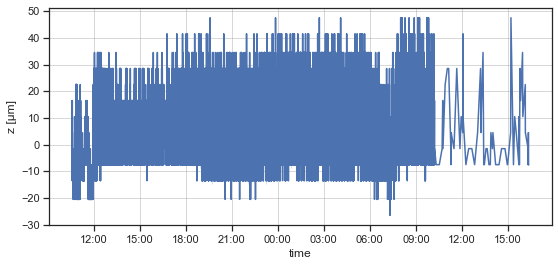

In [72]:
tdp.plot_data_vs_time(lao_random)

# Steel quer

In [73]:
steel_quer = tdu.read_single_measurement('MSA', '20211209_steel_quer.txt')
steel_quer = steel_quer.query(" x < 29.4 & y < 17 ")
steel_quer = steel_quer.query(" x > -29.4 & y > -17 ")
# steel_quer.query('-156 < z < -155')
steel_quer = steel_quer.query(" -156.3 > z > -156.7 ")#.query("run_nr==1")# cut measurements done on the table
# steel_quer = steel_quer.query(" ")#.query("run_nr==1")# cut measurements done on the table
steel_quer = tdu.df_convert_unix_to_datetime(steel_quer)


steel_quer['z'] = tdu.subtract_mean(steel_quer['z'])
steel_quer['z'] = tdu.convert_mm_to_microns(steel_quer['z'])

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

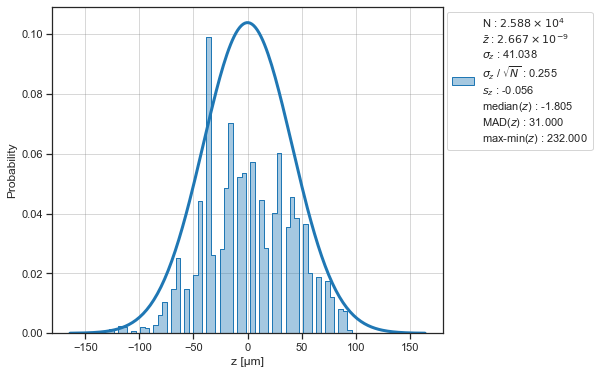

In [74]:
nbins = np.array(range(-50,50,6)) -0.5
tdp.ts_hist(steel_quer)

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

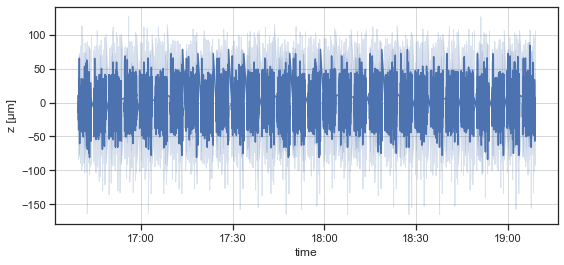

In [75]:
tdp.plot_data_vs_time(steel_quer)

Text(0.5, 1.0, 'title')

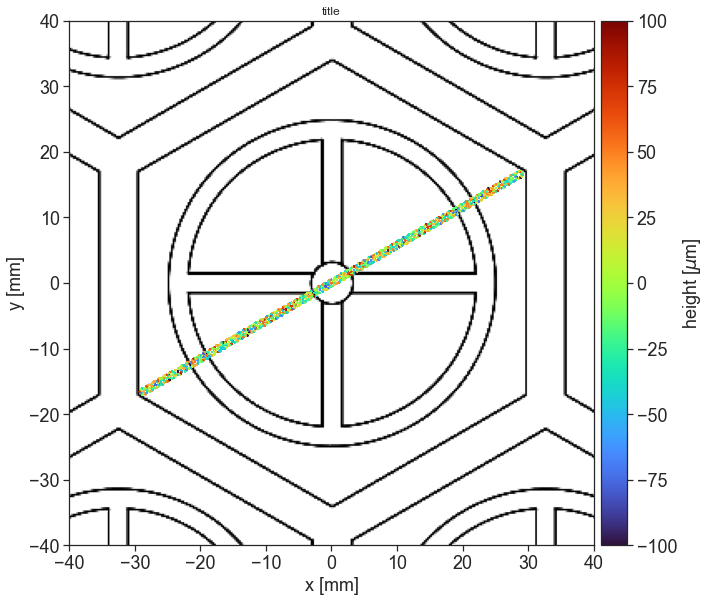

In [81]:
%matplotlib inline
steel_quer = steel_quer.query(" x < 29.78 & y < 17.30 ")
steel_quer = steel_quer.query(" x > -29.78 & y > -17.30 ")
fig, ax = tdp.full_hexagon_plot(steel_quer, mode="z", cmap='turbo', cbar_norm=(-100, 0, +100), size=1**2, figsize=(10,10))
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_title("title")

# table stay 24

In [85]:
table_stay_24 = tdu.read_single_measurement('MSA', '20211213_table_stay24.txt')
table_stay_24 = tdu.df_convert_unix_to_datetime(table_stay_24)
table_stay_24['z'] = tdu.subtract_mean(table_stay_24['z'] )
table_stay_24['z'] = tdu.convert_mm_to_microns(table_stay_24['z'] )

(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:xlabel='time', ylabel='z [µm]'>)

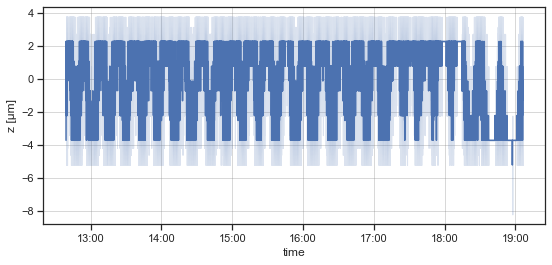

In [86]:
tdp.plot_data_vs_time(table_stay_24)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Probability'>)

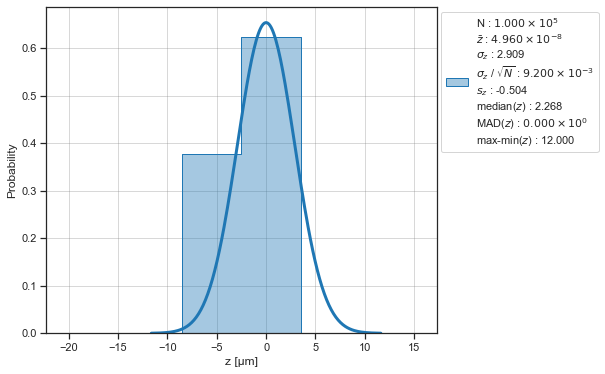

In [88]:
nbins = np.array(range(-20,20,6)) -0.5
tdp.ts_hist(table_stay_24, bins=nbins)